# Chapter 15. Recurrent Networks

## Exercise #9

### Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [3]:
from pathlib import Path
import os
import sys
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [5]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [7]:
train_files

['/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [8]:
eval_files

['/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/Users/diamondbot/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [9]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
  test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
  train_classes = train_classes_file.readlines()

In [17]:
assert train_classes == test_classes
class_names=[]
for name in range(len(train_classes)):
  class_name = train_classes[name].strip().lower()
  class_names.append(class_name)

In [18]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [20]:
tfrecpath = "/Users/diamondbot/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010"
os.path.exists(tfrecpath)

True

In [22]:
raw_dataset = tf.data.TFRecordDataset(tfrecpath)

for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

features {
  feature {
    key: "class_index"
    value {
      int64_list {
        value: 22
      }
    }
  }
  feature {
    key: "ink"
    value {
      float_list {
        value: 0.05349794030189514
        value: -0.23137253522872925
        value: 0.0
        value: 0.037037044763565063
        value: -0.09019608795642853
        value: 0.0
        value: 0.04938271641731262
        value: -0.05490196496248245
        value: 0.0
        value: 0.0905349850654602
        value: -0.0627450942993164
        value: 0.0
        value: 0.0658436119556427
        value: -0.027450980618596077
        value: 0.0
        value: 0.18106994032859802
        value: -0.027450980618596077
        value: 0.0
        value: 0.15226340293884277
        value: 0.007843137718737125
        value: 0.0
        value: 0.11934155225753784
        value: 0.04313725605607033
        value: 0.0
        value: 0.032921791076660156
        value: 0.027450982481241226
        value: 0.0
        value: 0.11

In [40]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [41]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
  dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_read_threads)
  if cache:
    dataset.cache()
  if shuffle_buffer_size:
    dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
  return dataset.prefetch(1)

In [42]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [43]:
for sketches, lengths, labels in train_set.take(1):
  print("sketches = ", sketches)
  print("lengths = ", lengths )
  print("labels = ", labels)

sketches =  tf.Tensor(
[[[ 0.01968503  0.05095541  0.        ]
  [ 0.03149611  0.03184712  0.        ]
  [ 0.12204725 -0.01273882  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.15686277  0.          0.        ]
  [-0.04705882  0.01851851  0.        ]
  [-0.09411766  0.05555555  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.09842521  0.0608108   0.        ]
  [-0.09842519  0.09459461  0.        ]
  [-0.09055118  0.14864865  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.0236221  -0.03048781  1.        ]
  [ 0.0236221   0.03048781  0.        ]
  [-0.05905515 -0.0487805   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.   

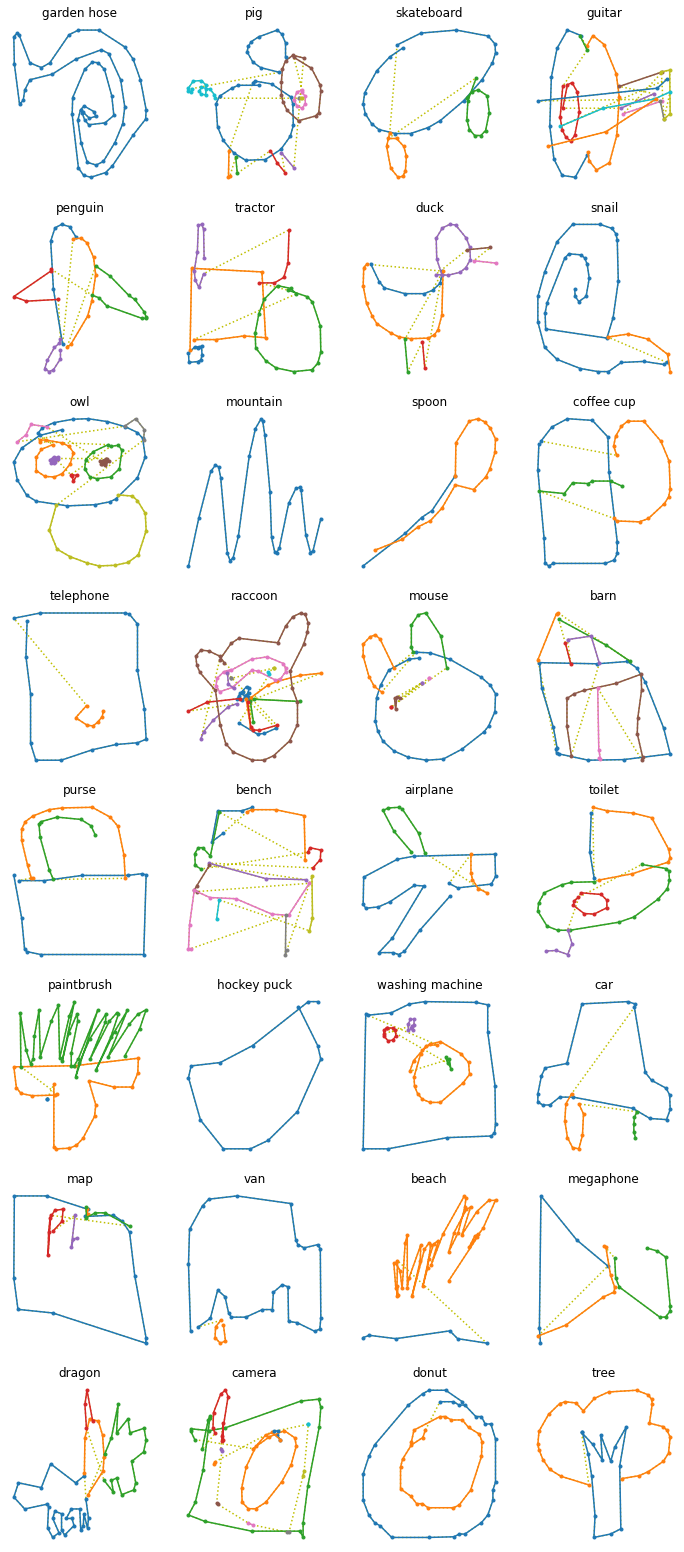

In [48]:
def draw_sketch(sketch, label=None):
  origin = np.array([[0., 0., 0.]])
  sketch = np.r_[origin, sketch]
  stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
  coordinates = np.cumsum(sketch[:, :2], axis=0)
  strokes = np.split(coordinates, stroke_end_indices + 1)
  title = class_names[label.numpy()] if label is not None else "Try to guess"
  plt.title(title)
  plt.plot(coordinates[:,0], -coordinates[:, 1], "y:")
  for stroke in strokes:
    plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
  plt.axis("off")

def draw_sketches(sketches, lengths, labels):
  n_sketches = len(sketches)
  n_cols = 4
  n_rows = (n_sketches - 1) // n_cols + 1
  plt.figure(figsize=(n_cols * 3, n_rows * 3.5)) 
  for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
    plt.subplot(n_rows, n_cols, index + 1)
    draw_sketch(sketch[:length], label)
  plt.show()

for sketches, lengths, labels in train_set.take(1):
  draw_sketches(sketches, lengths, labels)
